In [1]:
####This part is a ready-to-use block, which makes it possible to import ipynb in Jupyter notebook.
##Please ignore this block!
##Please ignore this block!
##Please ignore this block!
##Please ignore this block!
import io, os, sys, types
from IPython import get_ipython
from nbformat import current
from IPython.core.interactiveshell import InteractiveShell


def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path


class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = current.read(f, 'json')


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == 'code' and cell.language == 'python':
                # transform the input to executable Python
                    code = self.shell.input_transformer_manager.transform_cell(cell.input)
                # run the code in themodule
                    exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod


class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
#Import the downloading module to download data from public resources.
import dlyc
import sqlyc

importing Jupyter notebook from dlyc.ipynb
importing Jupyter notebook from sqlyc.ipynb


In [3]:
#Retrieve available stock names (Symbol;Company;Industry;Sector) in an exchangemarket from public resouces.
exchangemarket=input('Please input the exchange market (e.g., AMEX/NYSE/NSADAQ):')
symbollist=dlyc.getsymbol(exchangemarket)
print('The available symbols in',exchangemarket.upper(), 'has been downloaded!')

Please input the exchange market (e.g., AMEX/NYSE/NSADAQ):amex
The available symbols in AMEX has been downloaded!


In [4]:
#Retrieve stock data (Date;Open;High;Low;Close;Volume) from public resouces.
#At the same time, a csv file will also be stored in the local directory.
stockname=input('Please input the stock name: ')
datafile=dlyc.getdetail(stockname)

Please input the stock name: baba
The historical data of BABA has been downloaded in a csv file.


In [5]:
#Write it to MySQL database.
cnsql=sqlyc.link()
sqlyc.writesymbol(symbollist,exchangemarket,cnsql)
print('Congratulations! All available symbols in',exchangemarket.upper(),\
      'has been stored/updated in MySQL database!')

Successfully connected to MySQL database!
Uploading the data to MySQL database, please wait!
Congratulations! All available symbols in AMEX has been stored/updated in MySQL database!


In [6]:
##Write stock data to MySQL database.
cnsql=sqlyc.link()
sqlyc.writedetail(datafile,stockname,cnsql)
print('Congratulations! The historical data of',stockname.upper(),'has been stored/updated in MySQL database.')

Successfully connected to MySQL database!
Uploading the data to MySQL database, please wait!
Congratulations! The historical data of BABA has been stored/updated in MySQL database.


In [6]:
#Specify the data sample.
startdate=input('Please indicate the start date (YEAR-MON-DAY):')
enddate=input('Please indicate the end date (YEAR-MON-DAY):')
data=dlyc.getclosedata(datafile,startdate,enddate)
print('Contratulations! The details of',stockname.upper(),'in the\
specific time interval has been stored in a LIST named data.')

Please indicate the start date (YEAR-MON-DAY):2017-01-01
Please indicate the end date (YEAR-MON-DAY):2018-01-01
Contratulations! The details of BABA in thespecific time interval has been stored in a LIST named data.


In [7]:
#Import macdyc module to caculate MACD related parameters.
import macdyc

importing Jupyter notebook from macdyc.ipynb


In [8]:
## Compute the diffsig, i.e., diff-signal!
#Short period, long period and the signal period required!
shortperiod=input('Please input the short period (days) for MACD:')
longperiod=input('Please input the long period (days) for MACD:')
signalperiod=input('Please input the period (days) for calculating the signal line:')
diffsig=macdyc.crossover(data,shortperiod,longperiod,signalperiod)

Please input the short period (days) for MACD:9
Please input the long period (days) for MACD:26
Please input the period (days) for calculating the signal line:30


macdyc.ipynb:4: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  "cell_type": "code",


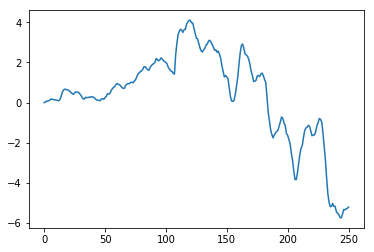

In [10]:
#Show the Buy-Sell line!
macdyc.trend(diffsig)

In [11]:
#Get the action sequence on each trading day according to the diff-sig
action=macdyc.actions(diffsig)

In [12]:
#Given an initial value, we can return the revenue details of the MACD strategy.
initialvalue=input('Please indicate the initial capital:')
commissionrate=input('Please indicate the commission rate:')
revenuedetails=macdyc.valuedetail(action,data,initialvalue,commissionrate)
print('Congratulations! The revenue details of the MACD strategy has been generated and you can check!')

Please indicate the initial capital:1000000
Please indicate the commission rate:0
Congratulations! The revenue details of the MACD strategy has been generated and you can check!


The change of stock price is shown in the green line.
The change of revenues is shown in the green line.


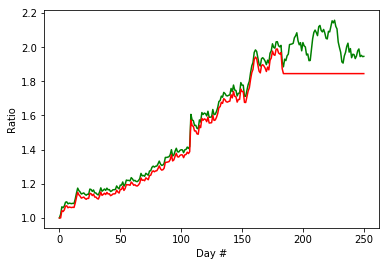

In [13]:
#Look through the change of revenues/stockprices.
changeofstock=macdyc.ratio(data)
changeofvalue=macdyc.ratio(revenuedetails[0])
macdyc.compare(changeofstock,changeofvalue)
print('The change of stock price is shown in the green line.')
print('The change of revenues is shown in the green line.')

In [14]:
#Return the PNL of the MACD strategy!
print('PNL of the MACD strategy is',revenuedetails[0][-1]-revenuedetails[0][0])
#Program end!

PNL of the MACD strategy is 845320.9590100541
